# Training YOLO with Ultralytics pipeline

In [1]:
from ultralytics import YOLO
import os, sys
from tqdm.notebook import tqdm
import ultralytics
ultralytics.checks()

import torch
import math
# this ensures that the current MacOS version is at least 12.3+
print(torch.backends.mps.is_available())
# this ensures that the current current PyTorch installation was built with MPS activated.
print(torch.backends.mps.is_built())

%matplotlib inline

assert sys.version_info >= (3, 8), "Python 3.8  is required."

Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-2.0.1 CPU
Setup complete ✅ (10 CPUs, 32.0 GB RAM, 339.1/926.4 GB disk)


True
True


In [2]:
# Load a model
#model = YOLO('yolov8n.yaml')  # build a new model from scratch
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# # If using MPS on Apple Silicon
# if torch.backends.mps.is_built():
#     mps_device = torch.device("mps")
#     model.to(mps_device)

# # OPTIONAL for memory errors
# # Set the value of PYTORCH_MPS_HIGH_WATERMARK_RATIO
# os.environ["PYTORCH_MPS_HIGH_WATERMARK_RATIO"] =  "0.3"

## Train

In [3]:
import wandb
wandb.init(project="MITFisheryHerring",notes="MIT Fishery robo analytics Outputs per training example: 2 Blur: Up to 4px. Now added ~50 more images")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: aus10powell. Use `wandb login --relogin` to force relogin


In [4]:
# Use the model
results = model.train(data='river_herring.yaml', epochs=15,dropout=0.4,device='mps')  # can also try mps

New https://pypi.org/project/ultralytics/8.0.120 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-2.0.1 MPS
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=river_herring.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.4, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, forma

In [5]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-2.0.1 MPS
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITRiverHerringTemp/valid/labels.cache... 94 images, 0 backgrounds, 0 corrupt: 100%|██████████| 94/94 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:27<00:00,  4.51s/it]
                   all         94        112       0.88      0.982      0.953      0.676
Speed: 9.0ms preprocess, 252.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val12


array([    0.67647])

In [6]:
# from ultralytics.yolo.utils.benchmarks import benchmark

# # Benchmark on GPU
# benchmark(model=model, imgsz=640, half=False, device='cpu')

### Export Model

In [19]:
# Export the model
model.export(format='saved_model')

Ultralytics YOLOv8.0.118 🚀 Python-3.9.16 torch-2.0.1 MPS

PyTorch: starting from runs/detect/train36/weights/best.pt with input shape (16, 3, 640, 640) BCHW and output shape(s) (16, 5, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.12.0...

ONNX: starting export with onnx 1.14.0 opset 17...
ONNX: simplifying with onnxsim 0.4.31...


================ Diagnostic Run torch.onnx.export version 2.0.1 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 12.1s, saved as runs/detect/train36/weights/best.onnx (11.6 MB)

TensorFlow SavedModel: running 'onnx2tf -i runs/detect/train36/weights/best.onnx -o runs/detect/train36/weights/best_saved_model -nuo --non_verbose'
TensorFlow SavedModel: export success ✅ 24.9s, saved as runs/detect/train36/weights/best_saved_model (29.2 MB)

Export complete (42.0s)
Results saved to /Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train36/weights
Predict:         yolo predict task=detect model=runs/detect/train36/weights/best_saved_model imgsz=640 
Validate:        yolo val task=detect model=runs/detect/train36/weights/best_saved_model imgsz=640 data=river_herring.yaml 
Visualize:       https://netron.app


'runs/detect/train36/weights/best_saved_model'

### Load Model

In [17]:
## Record of models:
## 
# 'runs/detect/train36/weights/best_saved_model' Wandb:  https://wandb.ai/aus10powell/MITFisheryHerring/runs/txn0c9x3


model_best = YOLO( "/Users/aus10powell/Downloads/RiverHerring/runs/detect/train38/weights/best.pt")

In [7]:
model_best = model
#model_best = YOLO( "/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/runs/detect/train28/weights/best.pt")


image 1/1 /Users/aus10powell/Downloads/RiverHerring/River Herring JRWA/2013 Johne RIver Wapping Rd Dam/vlcsnap-2016-12-20-11h40m56s911.jpg: 384x640 (no detections), 11818.0ms
Speed: 243.9ms preprocess, 11818.0ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


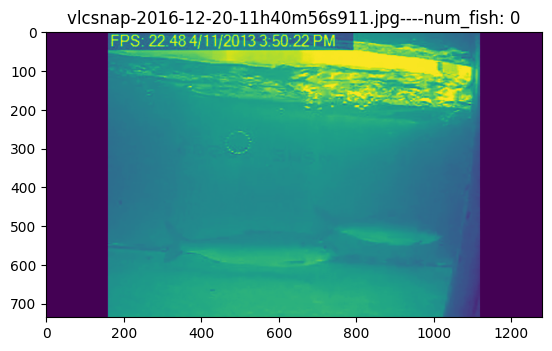

In [12]:

import matplotlib.pyplot as plt
import cv2



herring_example = '/Users/aus10powell/Downloads/RiverHerring/River Herring JRWA/2013 Johne RIver Wapping Rd Dam/vlcsnap-2016-12-20-11h40m56s911.jpg'
white_sucker_example = '/Users/aus10powell/Downloads/RiverHerring/River Herring JRWA/2013 Underwater fish Jones River/WhiteSuckerWapping (6).JPG'
small_image = '/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 (Large+annotations)/IRWA Small Jpgs/Batch 1/2_2017-04-14_19-03-04.jpg'
v2_test_image = '/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITFisheryHerringv2/test/images/1_2016-04-21_21-50-1804298_jpg.rf.011911b9c681d5b4af70a308cdd98b93.jpg' # 2 fish
v2_valid_image = '/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/data/datasets/MITFisheryHerringv2/valid/images/1_2016-04-21_21-50-1803927_jpg.rf.6b36f83367e966f41544ba7e229f4d05.jpg'

image = herring_example

results = model_best(image)
title = image.split("/")[-1]
num_fish = len(results[0].boxes.data)

annotated_frame = results[0].plot()
gray = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2GRAY)


plt.imshow(gray)
plt.title(title + f'----num_fish: {num_fish }')
plt.show()


## Tracking

In [9]:
from ultralytics import YOLO

model = YOLO(
    "./best.pt"
)
video_path = "/Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4"
results = model.track(
    source=video_path,
    tracker="/Users/aus10powell/Documents/Projects/MIT-Fishery-Counter/code/notebooks/bytetrack.yaml",
    show=True,
   #stream=True #Uncomment to use r in results as loop
)  # OPTIONAL: , tracker='custom_tracker.yaml'



    WARNING ⚠️ stream/video/webcam/dir predict source will accumulate results in RAM unless `stream=True` is passed,
    causing potential out-of-memory errors for large sources or long-running streams/videos.

    Usage:
        results = model(source=..., stream=True)  # generator of Results objects
        for r in results:
            boxes = r.boxes  # Boxes object for bbox outputs
            masks = r.masks  # Masks object for segment masks outputs
            probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 (no detections), 61.2ms
video 1/1 (2/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 (no detections), 57.8ms
video 1/1 (3/303) /Users/aus10powell/Downloads/RiverHerring/IRWA 2017 Videos/Fish Sightings 2017/2_2017-04-13_14-10-29.mp4: 480x640 (no detections)

### Experimenting